<a href="https://colab.research.google.com/github/dianaventura/bikesharingdata/blob/main/bikesharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



In the last decade, bike-sharing programs, with initiatives to increase bike use and encourage greener travel, have received increasing attention in cities across the world. These systems are replacing traditional bike rentals where the whole process from membership, rental and return has become seamless. The user is now able to easily rent a bike from one particular position and return at another.
Unlike other public transport services such as buses or trains, the exact duration of travel, departure and arrival position is recorded in these systems. The data being generated by these systems make them attractive for research as this provides great insight into user behaviour. The dataset chosen for this report contains the hourly count of rental bikes between 2011-2012 from Capital bikeshare system and also includes corresponding weather and seasonal information.


# Objectives



The objectives of my project are to	understand, identify, apply and evaluate different machine learning algorithms with my chosen dataset to predict the count of bike users.
This will be done with detailed data exploration and results will be delivered using evaluation metrics that will allow model comparison.


# Peer Reviewed paper 


This section includes a critical review of the paper titled ‘ Event labelling combining ensemble detectors and background knowledge’ by Hadi Fanaee-T, Joao Gama. 
The chosen paper addresses the drawbacks of human-based event labelling and attempts to provide an alternative solution using ensemble learning and background knowledge. Drawbacks such as how time-consuming and expensive human based event labelling is. The effectiveness of the proposed model was tested through a set of tasks on the bike sharing data set. 
The paper defines an event as ‘something that happens in space and time and creates change in the environment under study’ and event labelling as a ‘process of marking events in unlabeled data’. This study made use of ten ensemble detectors which were designed each with its own distinctive ability. Different techniques were involved such as regression trees, control charts and hierarchical clustering. These detectors in combination with background information proved to be effective. I found the use of the Fleiss’s kappa test to measure the rate of agreement between the event detectors in this context quite intriguing as it is not normally used in computer science papers. 


I found this paper to be contextually relevant to my own research as event detection on the bike-sharing data has many potential applications. One of which being, it could be incorporated in a decision system for better planning and management by the user in relation to optimal usage times. Can also be used to predict how likely it will be that a bike will be available. A recommendation system could be put in place so users are aware of severe weather conditions or encourage them to go out to participate in any ongoing events in their relevant city.

Find the paper here: https://link.springer.com/article/10.1007/s13748-013-0040-3


# Data Exploration


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.svm import LinearSVR

**Loading Data**

In [8]:
bike = pd.read_csv('../content/hour.csv')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Quick Data Exploration**

In this section, the dataset will be explored thoroughly. Firstly knowing the the contents and details of the original dataset gives us a better understanding of its collumns.

In [9]:
# Check the data size
print(f'The dataset contains {bike.shape[0]} rows, and {bike.shape[1]} columns')

The dataset contains 17379 rows, and 17 columns


Class Distribution was checked and this suggests no sampling was needed as the top ten most common values are close together.

In [10]:
#Check Class Distrubtion for Cnt

bike['cnt'].value_counts().head(10)

5     260
6     236
4     231
3     224
2     208
7     198
8     182
1     158
10    155
11    147
Name: cnt, dtype: int64

In [11]:
# Check the names of the columns
bike.columns

#check unique values 
print(len(bike['dteday'].unique()))

731


It is important to check the size and datatypes that the dataset contains in case that there are values that need converted. As this is a regression problem, the datatypes are ideal due to the data containing mostly numerical values, which makes it easy to deal with.

In [12]:
# Check the data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
bike.describe()
#the standard deviation and the mean are close this suggest that the data is normalised


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In the table above it shows that the dataset has a high standard deviation which means that values are generally far from the mean. This suggests that the data is distributed evenly.

**Correlated Features**



To give deeper insight into the data and the relationships between features in the dataset this section will explore correlation between variables. 

The pair dot plot below compares the bike usage count on working days and non-working days. It shows how the count decreases on working days for the whole 9-5 period and spikes again after the work day is over. This graph shows that working is big factor in whether or not a user rents a bike.

Text(0, 0.5, 'Bike Usage')

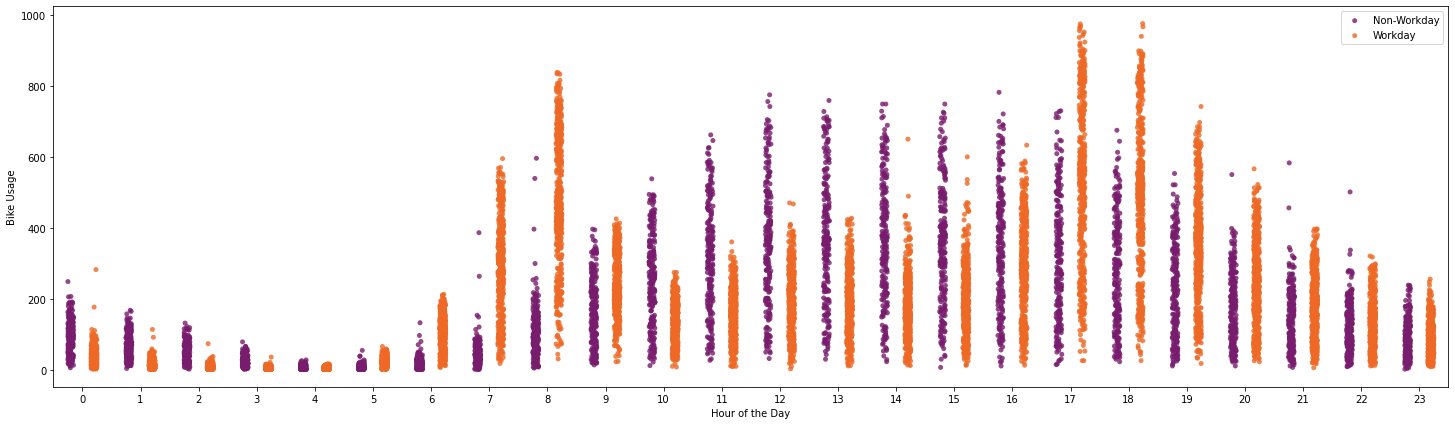

In [14]:
# Shows correrlation between bike usage and working days
fig, ax = plt.subplots(figsize=(25, 7))

ax = sns.stripplot(x='hr', y="cnt", hue="workingday", data=bike, palette="inferno",dodge=True, alpha=.8)

plt.legend(labels=['Non-Workday', 'Workday'])

plt.xlabel("Hour of the Day")
plt.ylabel("Bike Usage")

#working day is a binary figure 


The graphs below show how the weather affects user counts, with Winter having the least bike rentals and clear conditions being the most optimal for bike usage.

Text(0, 0.5, 'Bike Usage ')

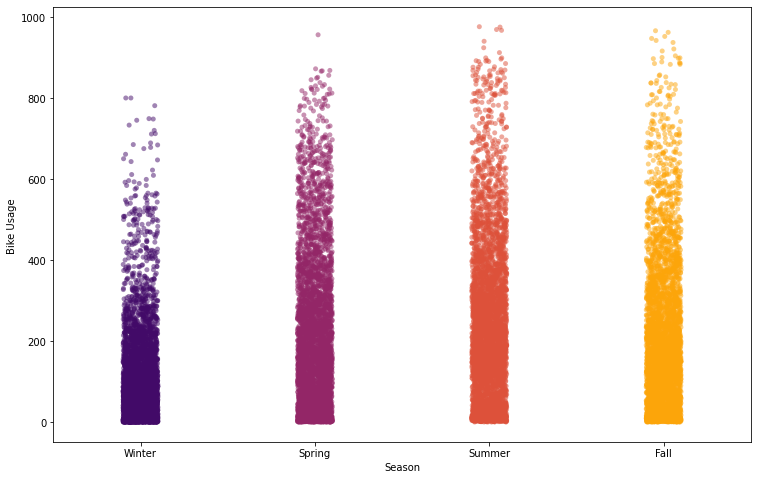

In [15]:
#Shows correlation between user count and season

fig, ax = plt.subplots(figsize=(12.5, 8))
ax = sns.stripplot(x='season', y="cnt", data=bike, palette="inferno", dodge=True, alpha=.5)
ax.set_xticklabels(["Winter", "Spring", "Summer", "Fall"])
plt.xlabel("Season")
plt.ylabel("Bike Usage ")

Text(0, 0.5, 'Bike Usage')

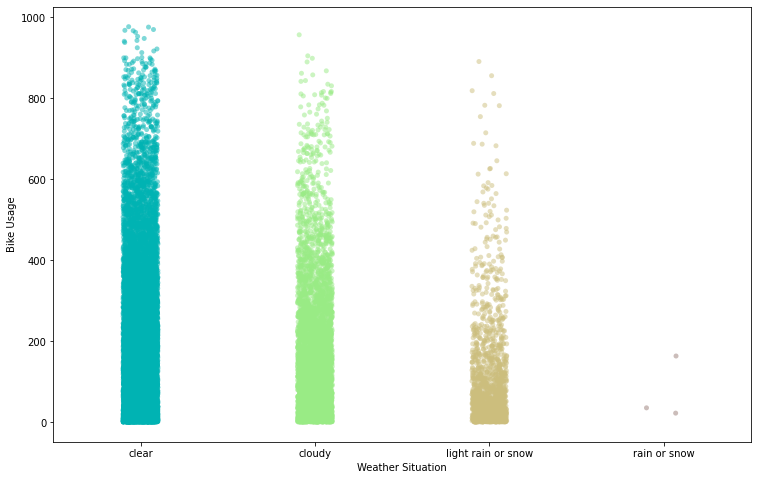

In [16]:
# Shows correrlation between bike usage and weather


fig, ax = plt.subplots(figsize=(12.5, 8))
ax = sns.stripplot(x='weathersit', y="cnt", data=bike, palette="terrain", dodge=False, alpha=.5)
ax.set_xticklabels(["clear", "cloudy", "light rain or snow", "rain or snow"])

plt.xlabel("Weather Situation")
plt.ylabel("Bike Usage")


# Pre-proccessing

Firstly, a check for missing and Nan values was carried out.

In [57]:
#Check for missing values 

round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

#No Missing Values found :)

instant       0.0
weathersit    0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
workingday    0.0
dteday        0.0
weekday       0.0
holiday       0.0
hr            0.0
mnth          0.0
yr            0.0
season        0.0
cnt           0.0
dtype: float64

As previously stated, the majority of the variables in the dataset are numberical and relevant.However, as we have other collumns that account for working days, holidays and weekdays, the date day was excluded and dropped from the copy of the dataset which will be used for training and testing.
The original dataframe was kept intact for potential further use.

In [58]:
#Removing unwanted collumns

#bike_new=bike[['instant','season','hr','mnth','workingday', 'weathersit','cnt']]
bike_new = bike.drop('dteday', axis = 1)
bike_new = bike_new.dropna()
bike_new.isnull().any().any()  #outputs false no Nan Values 

False

In [59]:
# split the data(X, y)


X = bike_new.drop('cnt', axis = 1)

y = bike_new['cnt']

X = np.array(X)
y = np.array(y)







In [60]:
#Splitting the Data and checking the size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

print ('The shape of the training set is ', X_train.shape)
#bike_new.to_numpy()

The shape of the training set is  (13903, 15)


In [61]:
print(X_train)

[[9.230e+03 1.000e+00 1.000e+00 ... 2.985e-01 5.200e+01 1.050e+02]
 [8.535e+03 1.000e+00 0.000e+00 ... 1.642e-01 9.000e+00 1.550e+02]
 [1.469e+03 1.000e+00 0.000e+00 ... 3.284e-01 1.000e+01 6.900e+01]
 ...
 [9.846e+03 1.000e+00 1.000e+00 ... 3.582e-01 0.000e+00 6.000e+00]
 [1.080e+04 2.000e+00 1.000e+00 ... 2.537e-01 1.400e+01 5.500e+01]
 [2.733e+03 2.000e+00 0.000e+00 ... 3.582e-01 4.400e+01 4.860e+02]]


The data contains different units and variables that are measured at different scales which do not contribute equally to the analysis. Previously, it was seen that the data followed a normal distribution this suggests the data has a Guassian bell curve.To avoid creating a bias the data was standardised as shown below. 

In [62]:
#data normalisation
from sklearn import preprocessing
#X_train = preprocessing.normalize(X_train)
#X_test = preprocessing.normalize(X_test)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)



[[ 0.112195   -1.35075099  0.99805986 ...  0.88291546  0.33469516
  -0.32187149]
 [-0.02622548 -1.35075099 -1.00194392 ... -0.21417968 -0.54325659
   0.00889156]
 [-1.4335336  -1.35075099 -1.00194392 ...  1.12716821 -0.52283911
  -0.56002089]
 ...
 [ 0.23488136 -1.35075099  0.99805986 ...  1.37060407 -0.72701393
  -0.97678234]
 [ 0.42488588 -0.4471958   0.99805986 ...  0.51694478 -0.44116918
  -0.65263455]
 [-1.18178757 -0.4471958  -1.00194392 ...  1.37060407  0.1713553
   2.19854298]]


In [63]:
#double checking 
print(f'Type of X_train {type(X_train)}')
print(f'Type of y_train {type(y_train)}')

Type of X_train <class 'numpy.ndarray'>
Type of y_train <class 'numpy.ndarray'>


# Model Selection


In this section, the data was fitted and trained to two models with the results recorded below.

In [47]:
# Decision Tree

#Create an instance of the Model
dm = DecisionTreeRegressor(random_state = 0) #r2 score at 0.99
#dm = DecisionTreeRegressor(max_depth = 3,max_leaf_nodes = 30, random_state=0) # r2 score at 0.94

In [48]:
#Train the model 


dm.fit(X_train, y_train)



DecisionTreeRegressor(random_state=0)

In [49]:
#Make Predictions
t_predictions = dm.predict(X_test)


In [50]:
# Get the model's accuracy

print(f'The MAE is: { mean_absolute_error(y_test, t_predictions)}') #outputs 2.89
print(f'The MSE is: {mean_squared_error(y_test, t_predictions)}')#outputs 34.27 higher than expected  
print(f'The R2 Score is: { r2_score(y_test, t_predictions)}')# outputs 0.99


The MAE is: 2.892692750287687
The MSE is: 34.27819332566168
The R2 Score is: 0.998972756615393


In [51]:
# RandomForestRegressor Model


from sklearn.ensemble import RandomForestRegressor
# create an instance of RandomForestRegressor
#rf=RandomForestRegressor() # r2 score at 0.77
rf = RandomForestRegressor(n_estimators=1000, max_features= 3,min_samples_leaf =5) # r2 score at 0.99
# fit the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=3, min_samples_leaf=5, n_estimators=1000)

In [52]:
# Predictions 
rf_predictions = rf.predict(X_test)


In [53]:


print(f'The MAE is: { mean_absolute_error(y_test, rf_predictions)}') # outputs 10.20
print(f'The MSE is: {mean_squared_error(y_test, rf_predictions)}') # outputs 342.2 a high numbers of errors produced
print(f'The R2 Score is: { r2_score(y_test, rf_predictions)}') # outputs 0.98



The MAE is: 10.12478414212252
The MSE is: 338.45219138894015
The R2 Score is: 0.9898573191618661


In [54]:
#SVM Model

from sklearn.svm import SVR

svm = SVR(kernel='linear',C = 10, gamma = 0.001)
#svm = SVR(kernel ='linear')
svm.fit(X_train,y_train)

SVR(C=10, gamma=0.001, kernel='linear')

In [55]:
# Predictions 
svm_predictions = svm.predict(X_test)

In [56]:
print(f'The MAE is: { mean_absolute_error(y_test, svm_predictions)}') # outputs 1.632
print(f'The MSE is: {mean_squared_error(y_test, svm_predictions)}') # outputs 6.005 an acceptable level error
print(f'The R2 Score is: { r2_score(y_test, svm_predictions)}') # outputs 0.9998

The MAE is: 1.631031994496363
The MSE is: 6.011955527119586
The R2 Score is: 0.9998198346836686


# Hypertuning Parameters

In this section, to improve model performance the best parameters were found for each model as shown below. In some cases, increasing the complexity of the model will not produce more accurate results(such as the case with the RF model used) and so the parameters were tested but not used.

In [34]:
import warnings
# ignore warnings
warnings.filterwarnings('ignore')

In [76]:

#hypertuning parameters for random forest model
from sklearn.model_selection import GridSearchCV


param_grid ={
 
  'max_features': [2, 3], #max num of featues for splitting node
  'min_samples_leaf': [3, 4, 5],# max num of levels per deicsionn tree 
  'n_estimators': [100, 200, 300, 1000]  #number of trees 
}

grid = GridSearchCV(estimator = rf, param_grid = param_grid)




In [77]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(max_features=3, min_samples_leaf=5,
                                             n_estimators=1000),
             param_grid={'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [100, 200, 300, 1000]})

In [78]:
best_params = grid.best_params_

# check best parameters
print(best_params)

# outputs {'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 1000}

{'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 1000}


In [79]:
#hypertuning parameters for tree decision model
from sklearn.model_selection import GridSearchCV


param_grid_d ={
 
  'max_depth': [2, 3], #max depth of tree 
  'max_leaf_nodes': [30, 40, 50],# max num of levels per deicsion tree 
  
}

grid_d = GridSearchCV(dm, param_grid = param_grid_d)




In [80]:
grid_d.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 3], 'max_leaf_nodes': [30, 40, 50]})

In [81]:
best_params = grid_d.best_params_

# check best parameters
print(best_params)
#outputs {'max_depth': 3, 'max_leaf_nodes': 30}

{'max_depth': 3, 'max_leaf_nodes': 30}


In [82]:
#hypertuning parameters for SVM model
from sklearn.model_selection import GridSearchCV


param_grid_sv ={
 "gamma": (0.001, 0.1), 
  "C": (1, 10) 
  
}

grid_sv = GridSearchCV(svm, param_grid = param_grid_sv)




In [83]:
grid_sv.fit(X_train,y_train)

GridSearchCV(estimator=SVR(C=10, gamma=0.001, kernel='linear'),
             param_grid={'C': (1, 10), 'gamma': (0.001, 0.1)})

In [84]:
best_params = grid_sv.best_params_

# check best parameters
print(best_params) #outputs {'C': 10, 'gamma': 0.001}

{'C': 10, 'gamma': 0.001}


# Model Evaluation 


The first algorithm used to fit the data was the Decision Tree regressor. This model was chosen for this dataset as there is not enough change in the data. This is ideal for a decision tree model as skewed distribution would cause major changes in the structure of the tree.
The second model used was Random Forest which is popular for regression problems and uses several decision trees rather than just one.
The third and most accurate model was the SVM model, this one was chosen because the risk of overfitting (which was the cause of original high MAE AND MSE scores) is less.
Initially, values for the MSE and MAE for the Decision and RF model were uncharacteristically high which was a major indicator that something was wrong. This was due to overfitting and solved by inclusion of more collumns from the dataset, this brought the accuracy indictators down to normal numbers. 
In addition, whilst hypertuning parameters, it was found that the RF model achieved better results without the suggested parameters. This is due to overfitting again, when overfitting occurs it was found that simplifying the model was the solution. Hence, why parameters for that model had to be removed.
In terms of error occurance, both the RF and the Decision model perform similarly. They both have a low MAE value which indicts the models fit the data well but higher MSE values which tells us there is high variance in the predictions the model is making. 
The most relevant evaluation metric for comparing models would be the R2 score which indicates how well the model fits the data. The model with the highest R2 score was the SVM model.
Overall, all the models performed fairly well but in particularly the SVM performed the best as its MSE and MAE were both low and its R2 score was the closest to 1.

# Conclusion 

To conclude, the use of  different machine learning algorithms to predict the count of bike users was successful.
Three separate models were used and it was found that SVM fitted the data the best. Techniques to optiise each model's parameters were carried out and evaluation metrics to compare the models were used.
In future when working with regression problems, it is recommended to avoid the use of Decision Tree models due to several factors.
When choosing a way to normalise the data, it was found that small changes to the dataset made large differences in the results. Hence, it is reasonable to deduce that decision trees cannot be used well with continuous numerical variables and are not recommended for regression problems.